## Reporte Práctica 4
## CI-0163   Análisis de Grandes Volúmenes de Datos
## Daniel Ricardo Ramírez Umaña, B45675

## Random Forest

### 1. Código y aprendizaje de la práctica 4 (30%)

#### &emsp; 1.1 Random Forest Algorithm

Las predicciones de los árboles se promedian entre todos los árboles de decisión, esto resulta en un mejor rendimiento que cualquier árbol individual del modelo.

Los árboles de decisión pueden utilizarse tanto para predecir mediante Redresión como Clasificación.
* Regresión: La predicción es la media de las predicciones de los árboles de decisión.
* Clasificación: La predicción es la etiqueta de clase de la mayoría de los votos .

#### &emsp; 1.2 Random Forest Scikit-Learn API

La biblioteca de aprendizaje automático scikit-learn Python proporciona una implementación de Random Forest para el aprendizaje automático.



In [1]:
# chequeando la versión scikit-learn
import sklearn
print(sklearn.__version__)

0.22.2.post1


#### &emsp; 1.3 Random Forest para Clasificación

Para esto podemos hacer uso de la función `make_classification()`

In [2]:
# test classification dataset
from sklearn.datasets import make_classification

# definomos el dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)

# resumen del dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


Podemos utilizar repetidamente **k-fold cross-validation** y con esto podemos reportar la media y la desviación estándar del **accuracy (precisión)** del modelo en todas las repeticiones y folds.

In [3]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# definimos el dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)

# definimos el modelo
model = RandomForestClassifier()

# evaluamos el modelo
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# se reporta el rendimiento
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.902 (0.030)


In [4]:
# make predictions using random forest for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# se define el dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)

# definimos el modelo
model = RandomForestClassifier()

# ajustamos el modelo a todo el dataset
model.fit(X, y)

# hacemos una única predicción
row = [[-8.52381793,5.24451077,-12.14967704,-2.92949242,0.99314133,0.67326595,-0.38657932,1.27955683,-0.60712621,3.20807316,0.60504151,-1.38706415,8.92444588,-7.43027595,-2.33653219,1.10358169,0.21547782,1.05057966,0.6975331,0.26076035]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


Como se puede ver, la observación fue predicha como clase 0

#### &emsp; 1.4 Random Forest para Regresión

Podemos usar la función  `make_regression()` para poder realizar esta tarea


In [5]:
# test regression dataset
from sklearn.datasets import make_regression

# definimos el dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)

# resumen del dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


Para este caso también vamos a hacer un **k-fold cross validation** y medir el rendimiento de cada uno. Para este caso se reportará la **media de error absoluto (mean absolute error - MAE)**.

In [6]:
# evaluamos un random forest ensemble para regresión
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

# definimos el dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)

# definimos el modelo
model = RandomForestRegressor()

# evaluamos el modelo
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# reporte de rendimiento
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -90.365 (8.357)


En este caso, podemos ver que el conjunto de bosques aleatorios con hiperparámetros por defecto alcanza un MAE de aproximadamente 90.

En primer lugar, el conjunto de bosques aleatorios se ajusta a todos los datos disponibles y, a continuación, se puede llamar a la función predict() para realizar predicciones sobre nuevos datos.

In [7]:
# random forest para hacer decisiones por predicción
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

# definimos el dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)

# definimos el modelo
model = RandomForestRegressor()

# ajustamos el modelo a todo el dataset
model.fit(X, y)

# se realiza una única predicción
row = [[-0.89483109,-1.0670149,-0.25448694,-0.53850126,0.21082105,1.37435592,0.71203659,0.73093031,-1.25878104,-2.01656886,0.51906798,0.62767387,0.96250155,1.31410617,-1.25527295,-0.85079036,0.24129757,-0.17571721,-1.11454339,0.36268268]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: -151


#### &emsp; 1.5 Hiperparámetros del Random Forest



###### &emsp;&emsp; 1.5.1 Explorar el Número de Muestras

Para entrenar nuestros modelos, podemos por medio del **bootstrap sample** indicar de cuánto queremos que sean las muestras y si es que queremos usar todo el dataset podemos poner esta valor en  `False`, pero esto no es recomendado

>0.1 0.857 (0.027)
>0.2 0.873 (0.026)
>0.3 0.878 (0.023)
>0.4 0.889 (0.026)
>0.5 0.893 (0.025)
>0.6 0.902 (0.028)
>0.7 0.896 (0.022)
>0.8 0.896 (0.022)
>0.9 0.904 (0.024)
>1.0 0.902 (0.025)


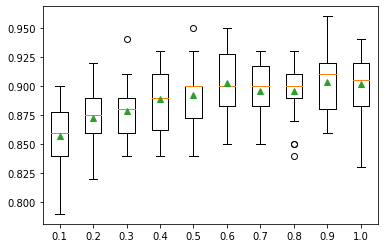

In [8]:
# explore random forest bootstrap sample size on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore ratios from 10% to 100% in 10% increments
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		# set max_samples=None to use 100%
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(max_samples=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

##### &emsp;&emsp; 1.5.2 Explorar el Número de Features

El número de **features (características o variables)** que se utilice en cada **split** del árbol de decisión es talvez el parámetro más importante de estos modelos.

Para esto podemos ajustar el valor de `max_features` por ejemplo a un valor de `sqrt(20)`

>1 0.892 (0.023)
>2 0.904 (0.027)
>3 0.901 (0.028)
>4 0.901 (0.026)
>5 0.895 (0.025)
>6 0.896 (0.024)
>7 0.894 (0.027)


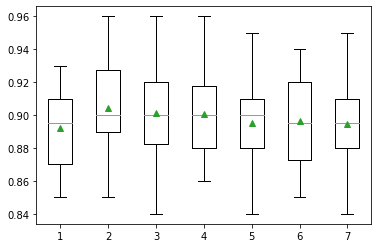

In [9]:
# explore random forest number of features effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 7
	for i in range(1,8):
		models[str(i)] = RandomForestClassifier(max_features=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Para este caso en particular pareciera que los features 2, 3 y 4 serían los más indicados a utilizar presentando una menor desviación estándar

##### &emsp;&emsp; 1.5.3 Explorar el Número de Árboles

La cantidad de árboles del modelo suele incrementarse hasta que se estabolice el desempeño del modelo. Este se puede ajustar al usar `n_estimators` y su valor por defecto es de 100.

>10 0.869 (0.038)
>50 0.896 (0.025)
>100 0.901 (0.024)
>500 0.906 (0.025)
>1000 0.909 (0.023)


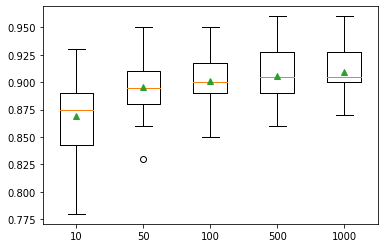

In [10]:
# explore random forest number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000]
	for n in n_trees:
		models[str(n)] = RandomForestClassifier(n_estimators=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

##### &emsp;&emsp; Explorar la Profundidad del Árbol

Estos por lo general de construyen de forma binaria y no se 'podan' (no se eliminan ramas). Sin embargo, es posible establecer una profundidad al usar `max_depth`

>1 0.766 (0.043)
>2 0.811 (0.038)
>3 0.832 (0.033)
>4 0.858 (0.030)
>5 0.873 (0.024)
>6 0.887 (0.025)
>7 0.888 (0.024)
>None 0.903 (0.026)


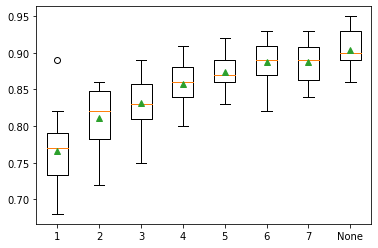

In [11]:
# explore random forest tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# consider tree depths from 1 to 7 and None=full
	depths = [i for i in range(1,8)] + [None]
	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Como se puede ver, entre más profundo el árbol, mejor su desempeño.

### 2. Aspectos que no quedan claros o que quisiera conocer mejor (5%)

Para este tema en particular no tengo niguna duda en particular, en sí cada hiperparámetro me parece tiene mucho sentido en su aplicación y me gustaría ya en práctica con el tiempo ir puliendo mi habilidad para ajustar estos parámetros de la mejor manera.

### 3. Estudie el impacto que tiene cada parámetro en el modelo resultante y escriba un comentario breve sobre sus hayazgos (15%)

* En cuanto al **tamaño de la muestra** al ajustar el `max_samples` en entre 0 y 1 tenemos que un tamaño pequeño de muestra hará que los árboles sean más diferentes entre sí y uno más grande hará que estos sean muy similares. Al asignar a `max_samples` un `None` el tamaño de la muestra será el mismo al de todo el dataset.
* En cuanto a la **cantidad de features** (características o variables) podría ser talvez el más importante. Ignorar aquellos features que tengan una mayor desviación estándar y que por ende pueda introducir más ruido en nuestro modelo puede ser de suma importancia para el desempeño de este.
* En cuanto a la **cantidad de árboles** tenemos que esta se puede ir ajustando hasta que el modelo llegua a estabilizarse en cuanto a su rendimiento, lo que nos asegura que no haya mucha variabilidad en cuanto a su implementación (al menos suponiendo que los datos con que fue entrenado son representativos del mundo real).
* En cuanto a la **profundidad del árbol**, entre más profundo es el árbol, su rendimiento suele ser mejor, pero es importante saber que esto puede hacer que su entrenamiento y posterior uso tenga un costo mayor en procesamiento, por lo que es importante medir costo-veneficio.